In [1]:
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

In [2]:
edges = gpd.read_file('antofa_edges.geojson')
meeting_points = gpd.read_file('puntos_encuentro_antofa.geojson')
zones = gpd.read_file('zones.json')
with open('shortest_paths.json') as file:
    shortest_paths = json.load(file)

In [3]:
zones.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry
0,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,19,2101011019,0.054746,0.000070,POLYGON ((-70.39531089899998 -23.5536356989999...
1,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,14,2101011014,0.045245,0.000083,POLYGON ((-70.38433839799995 -23.5647919219999...
2,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,3,2101011003,0.066789,0.000075,POLYGON ((-70.39095434399997 -23.5654404269999...
3,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,11,2101011011,0.017281,0.000012,POLYGON ((-70.39080217499998 -23.5781875979999...
4,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,1,2101011001,0.069676,0.000088,POLYGON ((-70.39089506499994 -23.5772469539999...


In [5]:
zones.shape

(46, 13)

In [18]:
zones['geometry'][0].representative_point().coords[0]

(-70.39843711770428, -23.55424286349995)

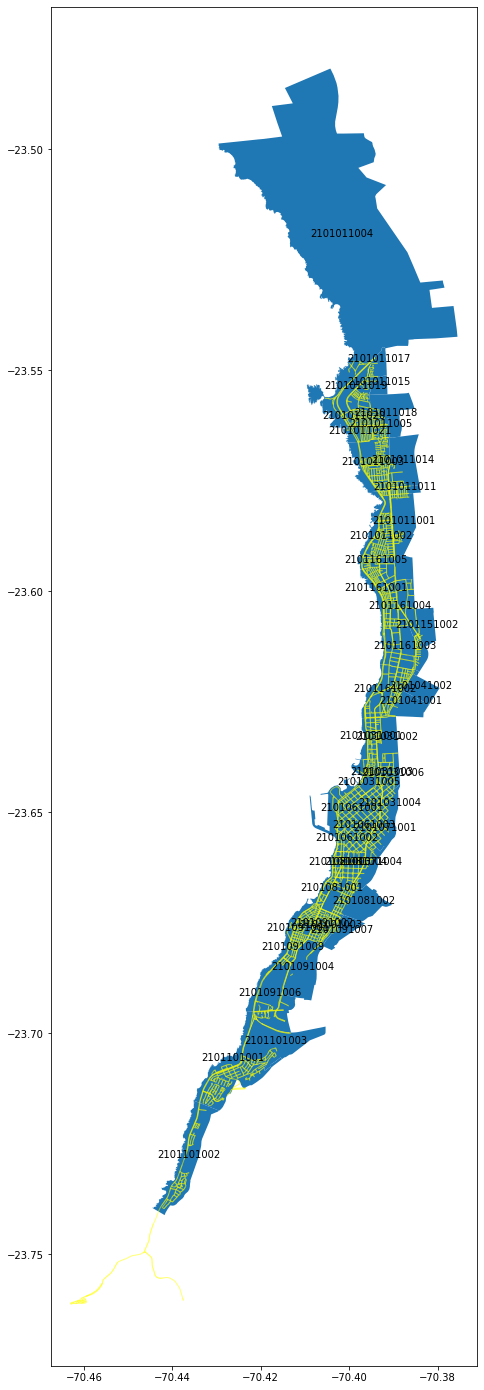

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 25))
zones.plot(ax=ax)
edges.plot(ax=ax, color='yellow', alpha=0.3, linewidth=1)
for idx, row in zones.iterrows():
    ax.annotate(s=str(row['GEOCODIGO']), xy=row['geometry'].representative_point().coords[0],
               horizontalalignment='center')

In [33]:
zones['x'] = zones.representative_point().apply(lambda p: p.x)
zones['y'] = zones.representative_point().apply(lambda p: p.y)
zones.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry,x,y
0,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,19,2101011019,0.054746,0.000070,POLYGON ((-70.39531089899998 -23.5536356989999...,-70.398437,-23.554243
1,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,14,2101011014,0.045245,0.000083,POLYGON ((-70.38433839799995 -23.5647919219999...,-70.387862,-23.570928
2,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,3,2101011003,0.066789,0.000075,POLYGON ((-70.39095434399997 -23.5654404269999...,-70.394550,-23.571372
3,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,11,2101011011,0.017281,0.000012,POLYGON ((-70.39080217499998 -23.5781875979999...,-70.387404,-23.577031
4,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,1,2101011001,0.069676,0.000088,POLYGON ((-70.39089506499994 -23.5772469539999...,-70.387614,-23.584678


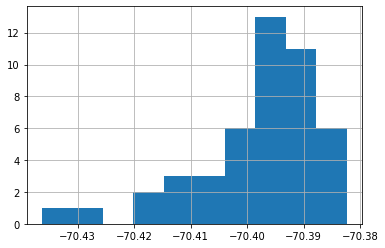

In [36]:
zones.x.hist()

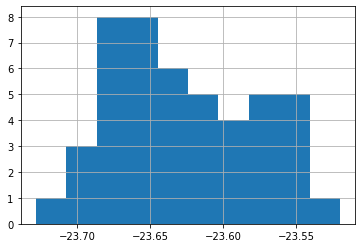

In [37]:
zones.y.hist()

In [52]:
zones = zones.sort_values('y', ascending=True)

In [53]:
zones_north = zones.iloc[1:16]
zones_center = zones.iloc[16: 31]
zones_south = zones.iloc[31:]

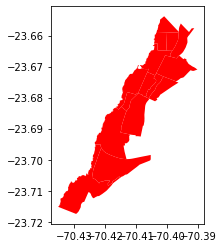

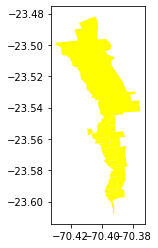

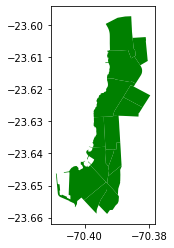

In [54]:
zones_north.plot(color='red')
zones_south.plot(color='yellow')
zones_center.plot(color='green')

In [59]:
for path_id in shortest_paths[0]['shortest_path']:
    edges[edges['id'] == path_id]

,backRefere,forwardRef,highway,id,key,length,oneway,u,v,geometry
8498,None,None,residential,1177,1.0,90.194038,1.0,589,3a6129162c7c3e7533ce4dc0fc677cb9,(LINESTRING (-70.39966520268639 -23.6551933009...


,backRefere,forwardRef,highway,id,key,length,oneway,u,v,geometry
858,None,6074e41b688e0f527c290bc567e902b9,residential,6074e41b688e0f527c290bc567e902b9,1.0,117.680063,1.0,3a6129162c7c3e7533ce4dc0fc677cb9,ef7571d827d95b33a04421ede84a61d7,"(LINESTRING (-70.399089 -23.6558111, -70.39833..."


,backRefere,forwardRef,highway,id,key,length,oneway,u,v,geometry
4160,None,91625844eae00f8267c782c40f1ceac4,residential,91625844eae00f8267c782c40f1ceac4_flip,0.0,116.709945,1.0,ef7571d827d95b33a04421ede84a61d7,0d9334c63b1bf7ffc36f6a97a9e68285,"(LINESTRING (-70.39833990000001 -23.6566193, -..."


,backRefere,forwardRef,highway,id,key,length,oneway,u,v,geometry
4168,None,39b4c63a7a3586925e8acd20fdea46f2,residential,39b4c63a7a3586925e8acd20fdea46f2_flip,0.0,127.381741,1.0,0d9334c63b1bf7ffc36f6a97a9e68285,612ccd68c04d3d631370a0a8a5024598,"(LINESTRING (-70.3975252 -23.6558793, -70.3970..."


,backRefere,forwardRef,highway,id,key,length,oneway,u,v,geometry
5899,c28a670d4f3c17a47a000e4056ffcdf2,0db57e06871adad0d08dfae1c7d258ad,residential,c28a670d4f3c17a47a000e4056ffcdf2,0.0,84.802694,0.0,612ccd68c04d3d631370a0a8a5024598,358ca5a864629279ec27c3f1afa028fe,"(LINESTRING (-70.39665690000001 -23.6550526, -..."


,backRefere,forwardRef,highway,id,key,length,oneway,u,v,geometry
5897,ab43ac6a0763cec367361e4ca625029c,4871f1256bbfb5301b5bc05d3f6f4b61,residential,ab43ac6a0763cec367361e4ca625029c,0.0,44.465517,0.0,358ca5a864629279ec27c3f1afa028fe,08f9c783a18da1dcb3947665e7394e09,"(LINESTRING (-70.3961067 -23.6556267, -70.3958..."


,backRefere,forwardRef,highway,id,key,length,oneway,u,v,geometry
5914,3f92ff25237e8d740cea4309f2534a10,3cce2fa323296ea6835cd65d37a2d8b2,residential,3f92ff25237e8d740cea4309f2534a10,0.0,22.869092,0.0,08f9c783a18da1dcb3947665e7394e09,5cfe26faaf2022b6ea53a9a91443db06,"(LINESTRING (-70.3958183 -23.6559278, -70.3956..."


In [66]:
north_poly = zones_north.dissolve(by='REGION').iloc[0]['geometry']
center_poly = zones_center.dissolve(by='REGION').iloc[0]['geometry']
south_poly = zones_south.dissolve(by='REGION').iloc[0]['geometry']

In [77]:
poly_dict = {'north': north_poly,
             'south': south_poly,
             'center': center_poly}
zone_paths_mask = dict()
for key, val in poly_dict.items():
    zone_paths_mask = []    
    for path_id in shortest_paths['shortest_path']:
        [edges[edges['id'] == path_id].geometry.iloc[0].within(north_poly)]

north POLYGON ((-70.41314720499997 -23.69982092199996, -70.41295272299995 -23.69982534199994, -70.41257267499998 -23.69980969599993, -70.41249909799996 -23.69980553099998, -70.41234003899996 -23.69979652699993, -70.41227063199995 -23.69979084899995, -70.41225531999999 -23.69978959599996, -70.41221529199998 -23.69978632199997, -70.41213041499998 -23.69977937799996, -70.41209111199998 -23.69977616299997, -70.41208888799997 -23.69977598099996, -70.41198267899995 -23.69976729199993, -70.41153366199995 -23.69970830799997, -70.41107194499995 -23.69962649999997, -70.41097896399998 -23.69960765199994, -70.40980845199994 -23.69937038199993, -70.409736346 -23.69935576599994, -70.40968197599994 -23.69934449799996, -70.40968190199999 -23.69934448299995, -70.40940671999994 -23.69928745299995, -70.40926495199994 -23.69925807199996, -70.40924550199998 -23.69925404099996, -70.40905603299996 -23.69921477399993, -70.40890580799999 -23.69918483599997, -70.40857113399994 -23.69911813799996, -70.4085341739

south POLYGON ((-70.38739307899993 -23.59198920999996, -70.38708150999997 -23.59205609299994, -70.38683665199994 -23.59211954399996, -70.38654891099998 -23.59219410699995, -70.38617959099997 -23.59228980899996, -70.38617769099994 -23.59229030199998, -70.38596123599996 -23.59231534299994, -70.38570859399994 -23.59232196399995, -70.38570486399993 -23.59236234899993, -70.38570074999996 -23.59239504699997, -70.38570019499997 -23.59239945599995, -70.38570014399994 -23.59239986099993, -70.38569120699998 -23.59247089999997, -70.38569130199994 -23.59248462699998, -70.38567359299998 -23.59279870099994, -70.38560139499998 -23.59423194299995, -70.38555458599996 -23.59521906499998, -70.38553905999999 -23.59554648599993, -70.38552677299998 -23.59582131699995, -70.38550907699994 -23.59626459599997, -70.38549209899998 -23.59668990099993, -70.38549147099997 -23.59672490799994, -70.38548489599998 -23.59687034499996, -70.38546866099995 -23.59722944299995, -70.38560249399997 -23.59722900499997, -70.38593

In [105]:
north_ids = edges[edges.within(north_poly) | edges.intersects(north_poly)]['id'].values
center_ids = edges[edges.within(center_poly) | edges.intersects(center_poly)]['id'].values
south_ids = edges[edges.within(south_poly) | edges.intersects(south_poly)]['id'].values

north_paths = []
center_paths= []
south_paths = []
for shortest_path in shortest_paths:
    if any([path_id in north_ids for path_id in shortest_path['shortest_path']]):
        north_paths.append(shortest_path)
    if any([path_id in center_ids for path_id in shortest_path['shortest_path']]):
        center_paths.append(shortest_path)
    if any([path_id in south_ids for path_id in shortest_path['shortest_path']]):
        south_paths.append(shortest_path)
        
json_dict = {'north': north_paths,
             'center': center_paths,
             'south': south_paths}

with open('shortest_path_zones.json', 'w') as file:
    json_string = json.dumps(json_dict)
    file.write(json_string)

NameError: name 'north_mask' is not defined

In [109]:
len(north_ids)

3891

In [110]:
len(center_ids)

4032

In [111]:
len(south_ids)

3746

In [106]:
north_paths = []
center_paths= []
south_paths = []
for shortest_path in shortest_paths:
    if any([path_id in north_ids for path_id in shortest_path['shortest_path']]):
        north_paths.append(shortest_path)
    if any([path_id in center_ids for path_id in shortest_path['shortest_path']]):
        center_paths.append(shortest_path)
    if any([path_id in south_ids for path_id in shortest_path['shortest_path']]):
        south_paths.append(shortest_path)
        
json_dict = {'north': north_paths,
             'center': center_paths,
             'south': south_paths}

with open('shortest_path_zones.json', 'w') as file:
    json_string = json.dumps(json_dict)
    file.write(json_string)

In [117]:
len(south_paths)

5451

In [115]:
len(center_paths)

5417

In [116]:
len(north_paths)

3560

In [119]:
zones_poly = gpd.GeoSeries([north_poly, center_poly, south_poly], crs=zones.crs)
zones_poly.to_file('zones_poly.json', driver="GeoJSON")

In [123]:
zones_poly.centroid

0    POINT (-70.4115506888535 -23.68576435581511)
1    POINT (-70.39165142478781 -23.6295932015841)
2      POINT (-70.39921396999831 -23.53392321236)
dtype: object